In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
orig = pd.read_csv('datasets/ConcreteStrengthData.csv')

train['dataset'] = 'train'
test['dataset'] = 'test'
orig['dataset'] = 'orig'

full = pd.concat([train, test], axis=0)

In [9]:
train

id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
0        0            525.0               0.0              0.0   
1        1            143.0             169.0            143.0   
2        2            289.0             134.7              0.0   
3        3            304.0              76.0              0.0   
4        4            157.0             236.0              0.0   
...    ...              ...               ...              ...   
5402  5402            446.0              24.0             79.0   
5403  5403            350.0               0.0              0.0   
5404  5404            295.8               0.0              0.0   
5405  5405            376.0              93.4              0.0   
5406  5406            190.7               0.0            125.2   

      WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  \
0              186.0                        0.0                    1125.0   
1              191.0                        8.0                     967.0   
2              185.7                        0.0                    1075.0   
3              228.0                        0.0                     932.0   
4              192.0                        0.0                     935.4   
...              ...                        ...                       ...   
5402           162.0                       11.6                     967.0   
5403           203.0                        0.0                     974.0   
5404           185.7                        0.0                    1076.2   
5405           162.6                       11.5                     955.8   
5406           166.6                        7.9                    1079.0   

      FineAggregateComponent  AgeInDays  Strength dataset  
0                      613.0          3     10.38   train  
1                      643.0         28     23.52   train  
2                      795.3         28     36.96   train  
3                      670.0        365     39.05   train  
4                      781.2         90     74.19   train  
...                      ...        ...       ...     ...  
5402                   712.0          3     15.42   train  
5403                   775.0        180     49.20   train  
5404                   759.3         28     39.30   train  
5405                   662.9         28     39.61   train  
5406                   770.1         56     63.14   train  

[5407 rows x 11 columns]

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import pandas as pd

df1 = pd.read_csv('datasets/train.csv')
df2 = pd.read_csv('datasets/ConcreteStrengthData.csv')

df1['data'] = 0
df2['data'] = 1
df1.drop(['id', 'Strength'], axis=1, inplace=True)
df2.drop(['Strength'], axis=1, inplace=True)
    
X = pd.concat([df1, df2], ignore_index=True)
y = X.pop('data')

model = lgb.LGBMClassifier()
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_tr, y_tr)
y_pred = model.predict(X_te)
print(roc_auc_score(y_te, y_pred))

scores = cross_val_score(lgb.LGBMClassifier(), X, y, cv=10, scoring='roc_auc')
print(scores)

# Display features importance
print(pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False))

0.5028195619908156
[0.12292052 0.10532455 0.04333938 0.10590779 0.05807297 0.07650342
 0.06828419 0.13091514 0.55977166 0.59648508]
FineAggregateComponent       487
CoarseAggregateComponent     457
CementComponent              454
WaterComponent               394
SuperplasticizerComponent    361
AgeInDays                    357
BlastFurnaceSlag             259
FlyAshComponent              231
dtype: int32


In [15]:
df2

CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0                540.0               0.0              0.0           162.0   
1                540.0               0.0              0.0           162.0   
2                332.5             142.5              0.0           228.0   
3                332.5             142.5              0.0           228.0   
4                198.6             132.4              0.0           192.0   
...                ...               ...              ...             ...   
1025             276.4             116.0             90.3           179.6   
1026             322.2               0.0            115.6           196.0   
1027             148.5             139.4            108.6           192.7   
1028             159.1             186.7              0.0           175.6   
1029             260.9             100.5             78.3           200.6   

      SuperplasticizerComponent  CoarseAggregateComponent  \
0                           2.5                    1040.0   
1                           2.5                    1055.0   
2                           0.0                     932.0   
3                           0.0                     932.0   
4                           0.0                     978.4   
...                         ...                       ...   
1025                        8.9                     870.1   
1026                       10.4                     817.9   
1027                        6.1                     892.4   
1028                       11.3                     989.6   
1029                        8.6                     864.5   

      FineAggregateComponent  AgeInDays  data  
0                      676.0         28     1  
1                      676.0         28     1  
2                      594.0        270     1  
3                      594.0        365     1  
4                      825.5        360     1  
...                      ...        ...   ...  
1025                   768.3         28     1  
1026                   813.4         28     1  
1027                   780.0         28     1  
1028                   788.9         28     1  
1029                   761.5         28     1  

[1030 rows x 9 columns]

In [16]:
df1

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0               525.0               0.0              0.0           186.0   
1               143.0             169.0            143.0           191.0   
2               289.0             134.7              0.0           185.7   
3               304.0              76.0              0.0           228.0   
4               157.0             236.0              0.0           192.0   
...               ...               ...              ...             ...   
5402            446.0              24.0             79.0           162.0   
5403            350.0               0.0              0.0           203.0   
5404            295.8               0.0              0.0           185.7   
5405            376.0              93.4              0.0           162.6   
5406            190.7               0.0            125.2           166.6   

      SuperplasticizerComponent  CoarseAggregateComponent  \
0                           0.0                    1125.0   
1                           8.0                     967.0   
2                           0.0                    1075.0   
3                           0.0                     932.0   
4                           0.0                     935.4   
...                         ...                       ...   
5402                       11.6                     967.0   
5403                        0.0                     974.0   
5404                        0.0                    1076.2   
5405                       11.5                     955.8   
5406                        7.9                    1079.0   

      FineAggregateComponent  AgeInDays  data  
0                      613.0          3     0  
1                      643.0         28     0  
2                      795.3         28     0  
3                      670.0        365     0  
4                      781.2         90     0  
...                      ...        ...   ...  
5402                   712.0          3     0  
5403                   775.0        180     0  
5404                   759.3         28     0  
5405                   662.9         28     0  
5406                   770.1         56     0  

[5407 rows x 9 columns]

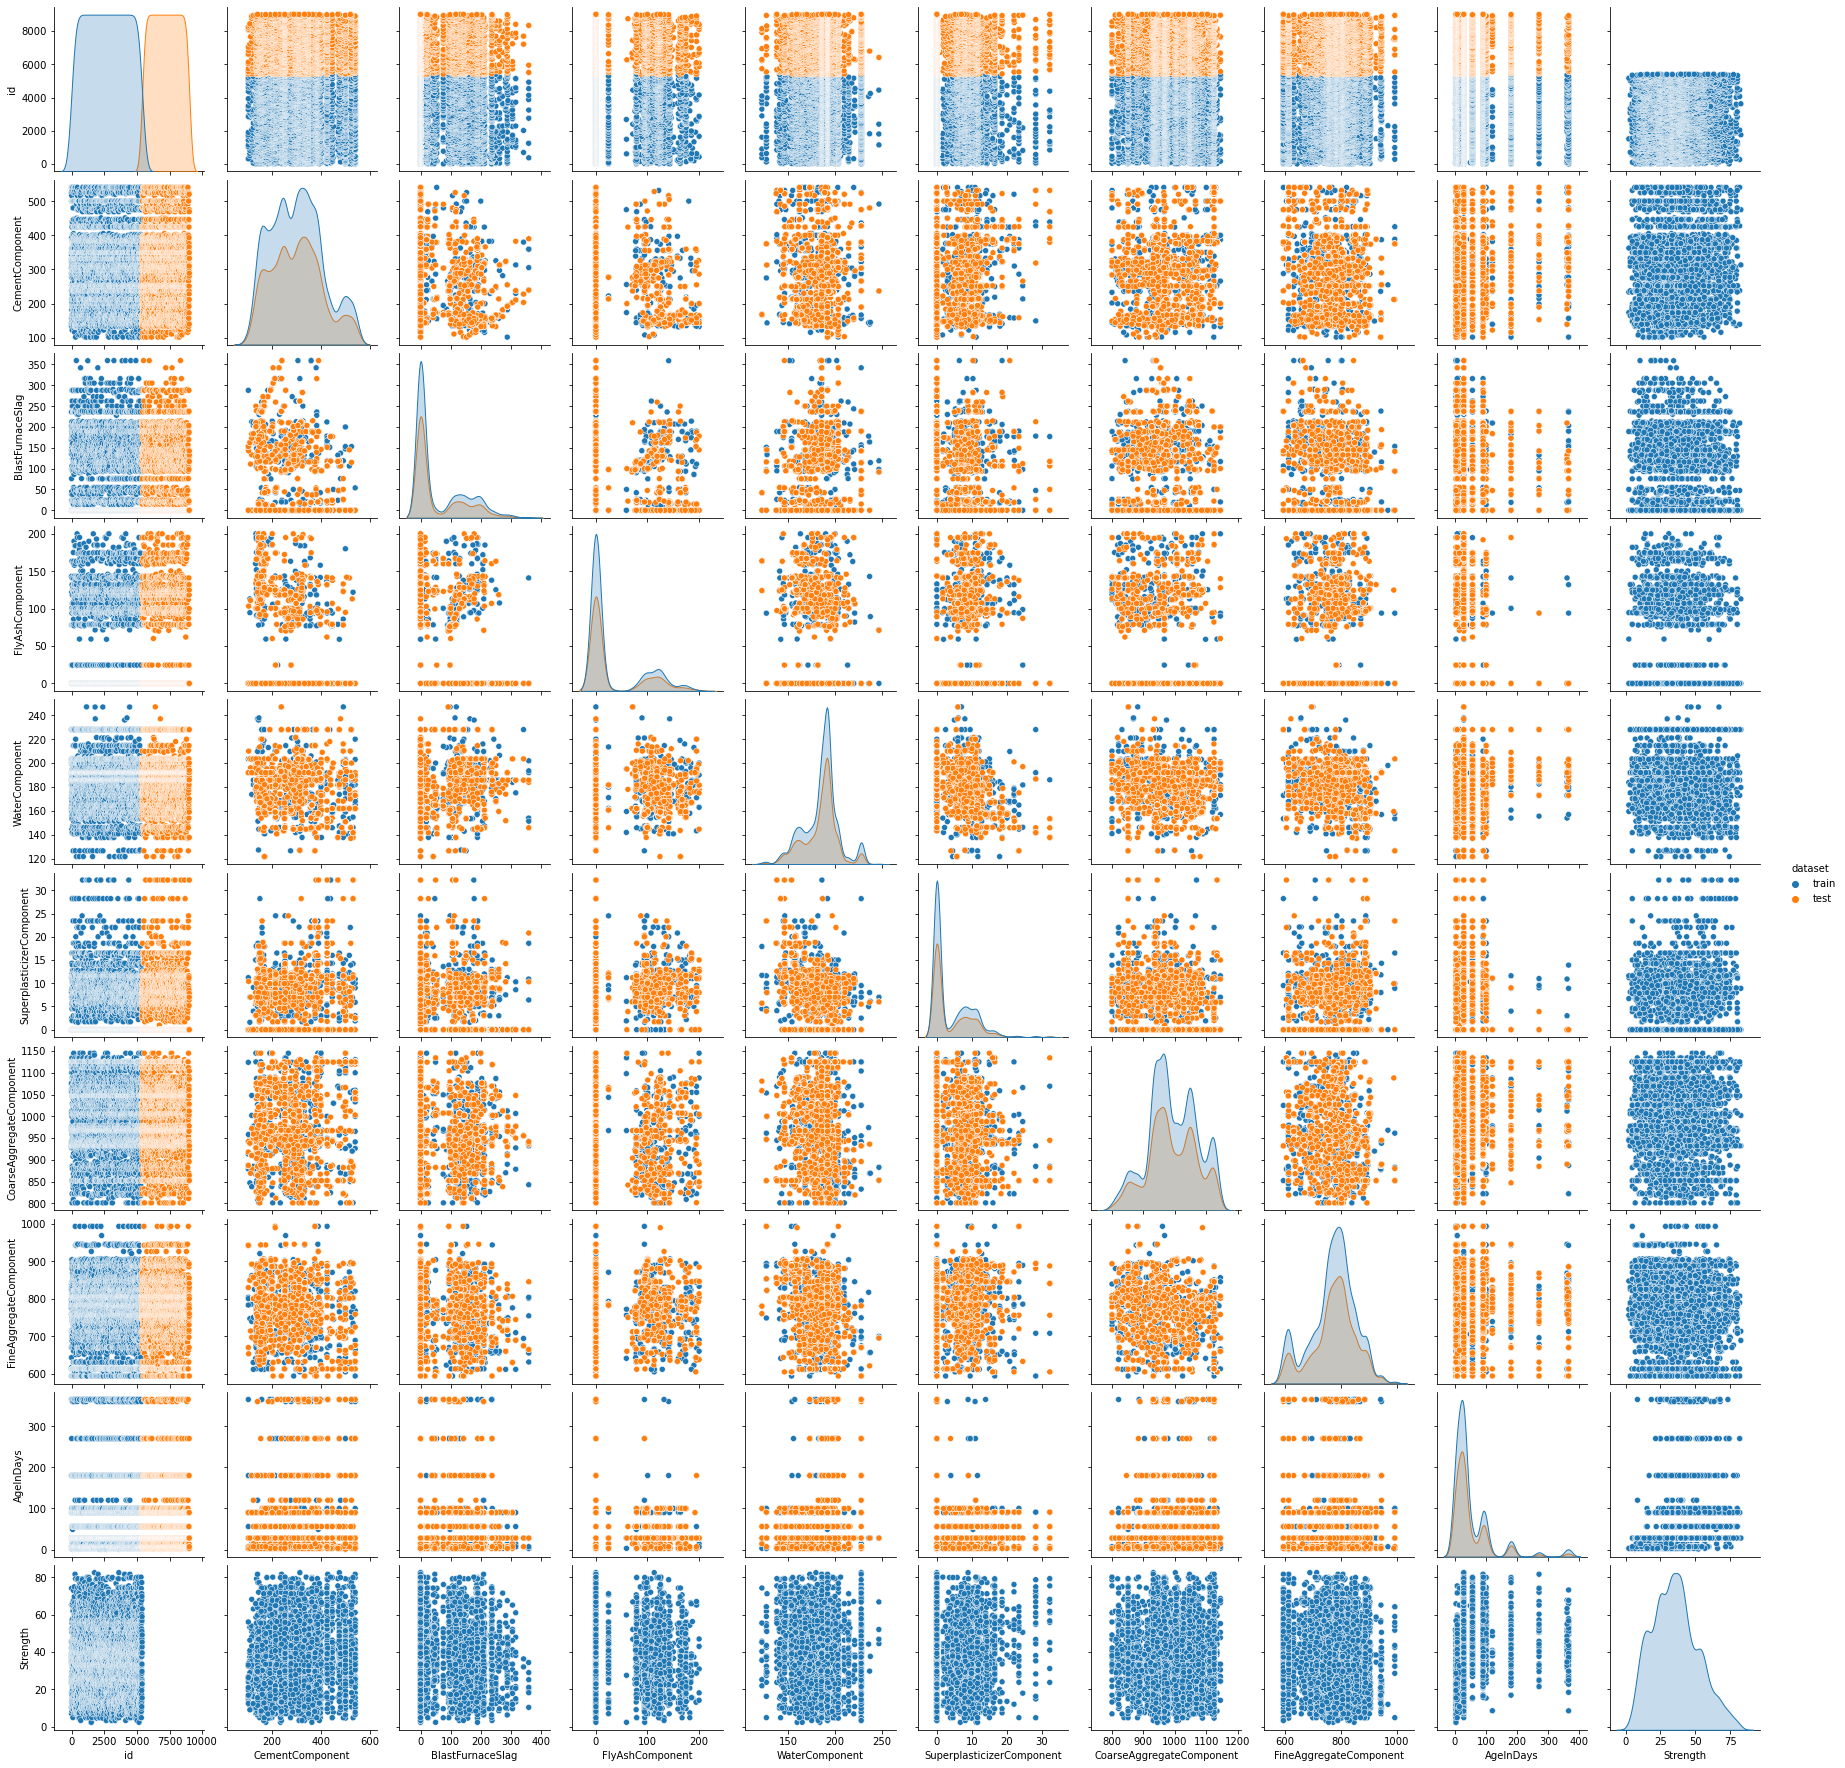

In [18]:
import seaborn as sns

sns.pairplot(full, hue='dataset')

In [22]:
from dataprep.eda import create_report
create_report(full).show_browser()

  0%|          | 0/2083 [00:00<?, ?it/s]

c:\Users\hzf04d\Anaconda3\envs\EDA\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\hzf04d\Anaconda3\envs\EDA\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [21]:
full

id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
0        0            525.0               0.0              0.0   
1        1            143.0             169.0            143.0   
2        2            289.0             134.7              0.0   
3        3            304.0              76.0              0.0   
4        4            157.0             236.0              0.0   
...    ...              ...               ...              ...   
3600  9007            140.0             129.0            100.0   
3601  9008            281.0               0.0              0.0   
3602  9009            289.0             133.0              0.0   
3603  9010            469.0             117.2              0.0   
3604  9011            332.5             142.5              0.0   

      WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  \
0              186.0                        0.0                    1125.0   
1              191.0                        8.0                     967.0   
2              185.7                        0.0                    1075.0   
3              228.0                        0.0                     932.0   
4              192.0                        0.0                     935.4   
...              ...                        ...                       ...   
3600           200.0                        7.0                     864.0   
3601           186.0                        0.0                    1104.0   
3602           194.0                        7.0                     924.0   
3603           137.8                       32.2                     852.1   
3604           228.0                        0.0                     932.0   

      FineAggregateComponent  AgeInDays  Strength dataset  
0                      613.0          3     10.38   train  
1                      643.0         28     23.52   train  
2                      795.3         28     36.96   train  
3                      670.0        365     39.05   train  
4                      781.2         90     74.19   train  
...                      ...        ...       ...     ...  
3600                   753.0         28       NaN    test  
3601                   774.0         28       NaN    test  
3602                   760.0         28       NaN    test  
3603                   840.5          3       NaN    test  
3604                   594.0          7       NaN    test  

[9012 rows x 11 columns]